In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

/var/folders/19/lfylndvd7nz_h_5ndkf4t_jc0000gn/T/ipykernel_3836/748847467.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
train=pd.read_csv('../env_titanic01/titanic/train.csv')
test=pd.read_csv('../env_titanic01/titanic/test.csv')
sub=pd.read_csv('../env_titanic01/titanic/gender_submission.csv')
data=pd.concat([train,test],sort=False)

In [3]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna('S',inplace=True)
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

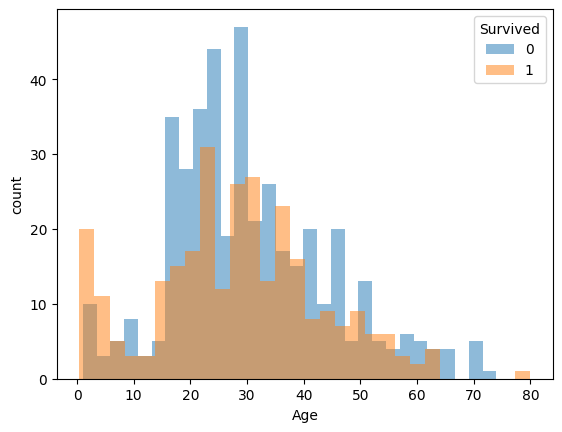

In [5]:
plt.hist(train.loc[train['Survived']==0,'Age'].dropna(),bins=30,alpha=0.5,label='0')
plt.hist(train.loc[train['Survived']==1,'Age'].dropna(),bins=30,alpha=0.5,label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived')

・Ageが低いほど、生存率が高い。\
・Ageが高くなると、生存率が高くなる。

In [6]:
data['Young']=0
data.loc[data['Age']<10,'Young']=1

train['Young']=data['Young'][:len(train)]
test['Young']=data['Young'][len(train):]

In [7]:
data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
413                                 Spector, Mr. Woolf    0  28.0      0   
414                       Oliva y Ocana, Dona. Fermina    1  39.0      0   
415                       Saether, Mr. Simon Sivertsen    0  38.5      0   
416                                Ware, Mr. Frederick    0  28.0      0   
417                           Peter, Master. Michael J    0  28.0      1   

     Parch              Ticket      Fare Cabin  Embarked  Young  
0        0           A/5 21171    7.2500   NaN         0      0  
1        0            PC 17599   71.2833   C85         1      0  
2        0    STON/O2. 3101282    7.9250   NaN         0      0  
3        0              113803   53.1000  C123         0      0  
4        0              373450    8.0500   NaN         0      0  
..     ...                 ...       ...   ...       ...    ...  
413      0           A.5. 3236    8.0500   NaN         0      0  
414      0            PC 17758  108.9000  C105         1      0  
415      0  SOTON/O.Q. 3101262    7.2500   NaN         0      0  
416      0              359309    8.0500   NaN         0      0  
417      1                2668   22.3583   NaN         1      0  

[1309 rows x 13 columns]

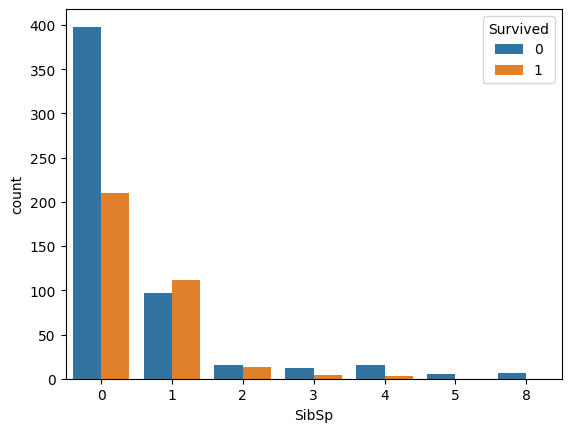

In [8]:
sns.countplot(x='SibSp',hue='Survived',data=train)
plt.legend(loc='upper right',title='Survived')

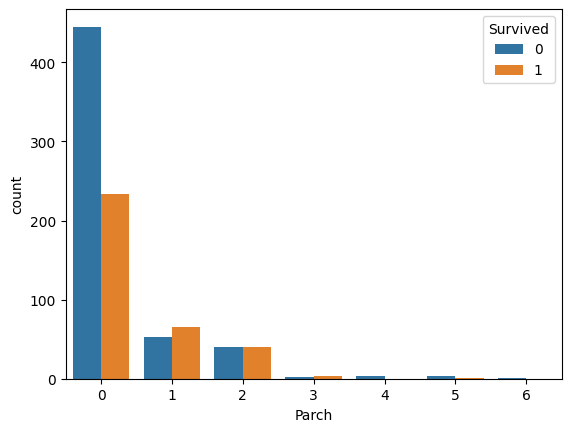

In [9]:
sns.countplot(x='Parch',hue='Survived',data=train)
plt.legend(loc='upper right',title='Survived')

<AxesSubplot: xlabel='FamilySize', ylabel='count'>

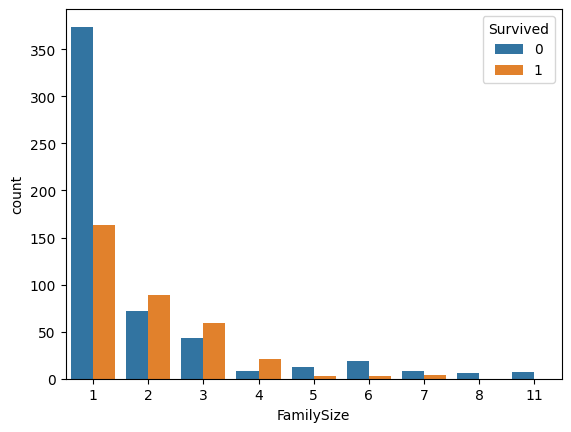

In [10]:
data['FamilySize']=data['Parch']+data['SibSp']+1
train['FamilySize']=data['FamilySize'][:len(train)]
test['FamilySize']=data['FamilySize'][len(train):]
sns.countplot(x='FamilySize',hue='Survived',data=train)

・家族の人数が増えるほど、生存率が下がる\
・一人の人は圧倒的に多く、生存率が低い

In [11]:
data['IsAlone']=0
data.loc[data['FamilySize']==1,'IsAlone']=1

train['IsAlone']=data['IsAlone'][:len(train)]
test['IsAlone']=data['IsAlone'][len(train):]

In [12]:
data['LargeFamily']=0
data.loc[data['FamilySize']>=5,'LargeFamily']=1

train['LargeFamily']=data['LargeFamily'][:len(train)]
test['LargeFamily']=data['LargeFamily'][len(train):]

In [13]:
data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
413                                 Spector, Mr. Woolf    0  28.0      0   
414                       Oliva y Ocana, Dona. Fermina    1  39.0      0   
415                       Saether, Mr. Simon Sivertsen    0  38.5      0   
416                                Ware, Mr. Frederick    0  28.0      0   
417                           Peter, Master. Michael J    0  28.0      1   

     Parch              Ticket      Fare Cabin  Embarked  Young  FamilySize  \
0        0           A/5 21171    7.2500   NaN         0      0           2   
1        0            PC 17599   71.2833   C85         1      0           2   
2        0    STON/O2. 3101282    7.9250   NaN         0      0           1   
3        0              113803   53.1000  C123         0      0           2   
4        0              373450    8.0500   NaN         0      0           1   
..     ...                 ...       ...   ...       ...    ...         ...   
413      0           A.5. 3236    8.0500   NaN         0      0           1   
414      0            PC 17758  108.9000  C105         1      0           1   
415      0  SOTON/O.Q. 3101262    7.2500   NaN         0      0           1   
416      0              359309    8.0500   NaN         0      0           1   
417      1                2668   22.3583   NaN         1      0           3   

     IsAlone  LargeFamily  
0          0            0  
1          0            0  
2          1            0  
3          0            0  
4          1            0  
..       ...          ...  
413        1            0  
414        1            0  
415        1            0  
416        1            0  
417        0            0  

[1309 rows x 16 columns]

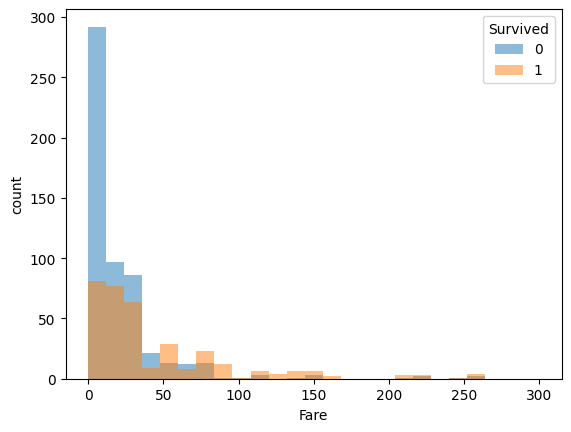

In [14]:
plt.hist(train.loc[train['Survived']==0,'Fare'].dropna(),range=(0,300),bins=25,alpha=0.5,label='0')
plt.hist(train.loc[train['Survived']==1,'Fare'].dropna(),range=(0,300),bins=25,alpha=0.5,label='1')
plt.xlabel('Fare')
plt.ylabel('count')
plt.legend(title='Survived')

・賃金が低いほど、生存率が低い

In [15]:
data['Poor']=0
data.loc[data['Fare']<50,'Poor']=1

train['Poor']=data['Poor'][:len(train)]
test['Poor']=data['Poor'][len(train):]

In [16]:
data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
413                                 Spector, Mr. Woolf    0  28.0      0   
414                       Oliva y Ocana, Dona. Fermina    1  39.0      0   
415                       Saether, Mr. Simon Sivertsen    0  38.5      0   
416                                Ware, Mr. Frederick    0  28.0      0   
417                           Peter, Master. Michael J    0  28.0      1   

     Parch              Ticket      Fare Cabin  Embarked  Young  FamilySize  \
0        0           A/5 21171    7.2500   NaN         0      0           2   
1        0            PC 17599   71.2833   C85         1      0           2   
2        0    STON/O2. 3101282    7.9250   NaN         0      0           1   
3        0              113803   53.1000  C123         0      0           2   
4        0              373450    8.0500   NaN         0      0           1   
..     ...                 ...       ...   ...       ...    ...         ...   
413      0           A.5. 3236    8.0500   NaN         0      0           1   
414      0            PC 17758  108.9000  C105         1      0           1   
415      0  SOTON/O.Q. 3101262    7.2500   NaN         0      0           1   
416      0              359309    8.0500   NaN         0      0           1   
417      1                2668   22.3583   NaN         1      0           3   

     IsAlone  LargeFamily  Poor  
0          0            0     1  
1          0            0     0  
2          1            0     1  
3          0            0     0  
4          1            0     1  
..       ...          ...   ...  
413        1            0     1  
414        1            0     0  
415        1            0     1  
416        1            0     1  
417        0            0     1  

[1309 rows x 17 columns]

<AxesSubplot: xlabel='Pclass', ylabel='count'>

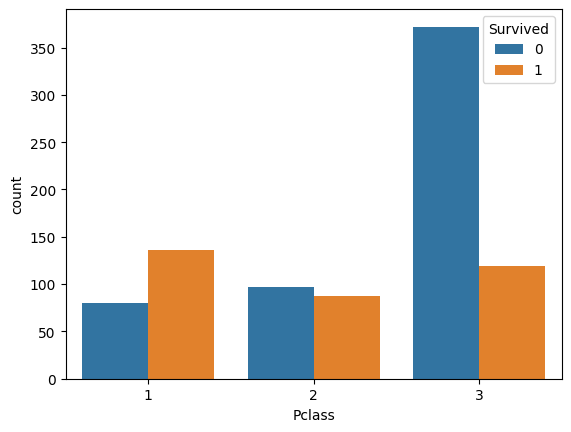

In [17]:
sns.countplot(x='Pclass',hue='Survived',data=train)

・先程の賃金が低いほど生存率が低いとの関連もあるが、Pclassが低くなる(3に近づく)ほど生存率が低い。

<AxesSubplot: xlabel='Sex', ylabel='count'>

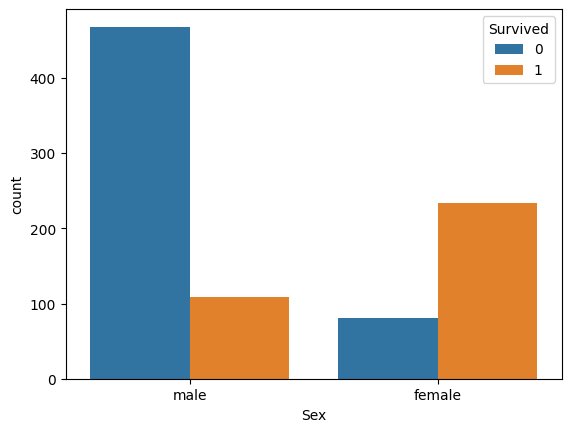

In [18]:
sns.countplot(x='Sex',hue='Survived',data=train)

・男の方が生存率が低い

<AxesSubplot: xlabel='Embarked', ylabel='count'>

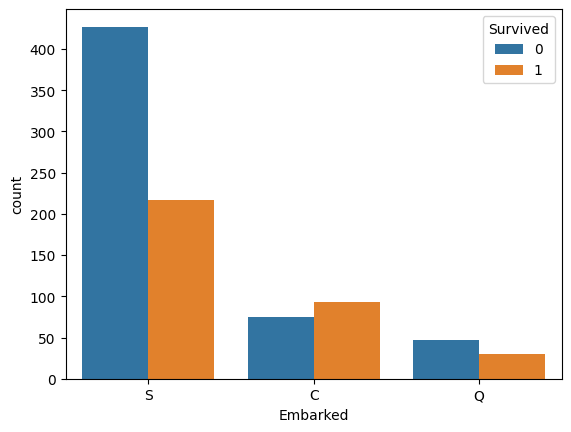

In [19]:
sns.countplot(x='Embarked',hue='Survived',data=train)

・乗船した場所がS, Qであれば生存率が低くなる。\
・乗船した場所がCであれば生存率が高くなる。

In [20]:
data['C']=0
data.loc[data['Embarked']==1,'C']=1

train['C']=data['C'][:len(train)]
test['C']=data['C'][len(train):]

In [21]:
data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
413                                 Spector, Mr. Woolf    0  28.0      0   
414                       Oliva y Ocana, Dona. Fermina    1  39.0      0   
415                       Saether, Mr. Simon Sivertsen    0  38.5      0   
416                                Ware, Mr. Frederick    0  28.0      0   
417                           Peter, Master. Michael J    0  28.0      1   

     Parch              Ticket      Fare Cabin  Embarked  Young  FamilySize  \
0        0           A/5 21171    7.2500   NaN         0      0           2   
1        0            PC 17599   71.2833   C85         1      0           2   
2        0    STON/O2. 3101282    7.9250   NaN         0      0           1   
3        0              113803   53.1000  C123         0      0           2   
4        0              373450    8.0500   NaN         0      0           1   
..     ...                 ...       ...   ...       ...    ...         ...   
413      0           A.5. 3236    8.0500   NaN         0      0           1   
414      0            PC 17758  108.9000  C105         1      0           1   
415      0  SOTON/O.Q. 3101262    7.2500   NaN         0      0           1   
416      0              359309    8.0500   NaN         0      0           1   
417      1                2668   22.3583   NaN         1      0           3   

     IsAlone  LargeFamily  Poor  C  
0          0            0     1  0  
1          0            0     0  1  
2          1            0     1  0  
3          0            0     0  0  
4          1            0     1  0  
..       ...          ...   ... ..  
413        1            0     1  0  
414        1            0     0  1  
415        1            0     1  0  
416        1            0     1  0  
417        0            0     1  1  

[1309 rows x 18 columns]

In [22]:
delete_columns=['Name','PassengerId','SibSp','Parch','Ticket','Cabin']
data.drop(delete_columns,axis=1,inplace=True)

In [23]:
pd.set_option('display.max_rows',None)

In [24]:
train=data[:len(train)]
test=data[len(train):]

y_train=train['Survived']
X_train=train.drop('Survived',axis=1)
X_test=test.drop('Survived',axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.3,random_state=0,stratify=y_train)

In [26]:
categorical_features=['C','Pclass','Sex','FamilySize','IsAlone','Poor','Young']

In [27]:
import lightgbm as lgb

lgb_train=lgb.Dataset(X_train,y_train,categorical_feature=categorical_features)
lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train,categorical_feature=categorical_features)

params={'objective':'binary'}

model=lgb.train(params,lgb_train,valid_sets=[lgb_train,lgb_eval],verbose_eval=10,num_boost_round=1000,early_stopping_rounds=10)

y_pred=model.predict(X_test,num_iteration=model.best_iteration)

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/Users/kaichi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kaichi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/kaichi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kaichi/.pyenv/versions/3.10.1/lib/pyth

In [28]:
y_pred[:10]

array([0.03451226, 0.51281511, 0.11187247, 0.05795139, 0.52582796,
       0.46027616, 0.69041833, 0.08071636, 0.78038932, 0.03416193])

In [30]:
y_pred=(y_pred>0.5).astype(int)
sub['Survived']=y_pred
sub.to_csv('submission_lightgbm_05.csv',index=False)